## taxi demand prediction in new york city
###problem statement is to predict the number of pickup values in the next 10 minute minutes in particular bin .

In [0]:

!pip3 install gpxpy
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

    100% |████████████████████████████████| 112kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/f0/5e/b8e85979e66efec3eaa0e47fbc5274db99fd1a07befd1b2aa4
Successfully built gpxpy


In [0]:
!pip3 install graphviz
!pip3 install dask
!pip3 install toolz
!pip3 install cloudpickle

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.5MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1kcIZlf-LQiQhqfSCZb719Nh6Rqkp2zKK' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1kcIZlf-LQiQhqfSCZb719Nh6Rqkp2zKK


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yellow_tripdata_2015-01.csv')  

In [0]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [0]:
month.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


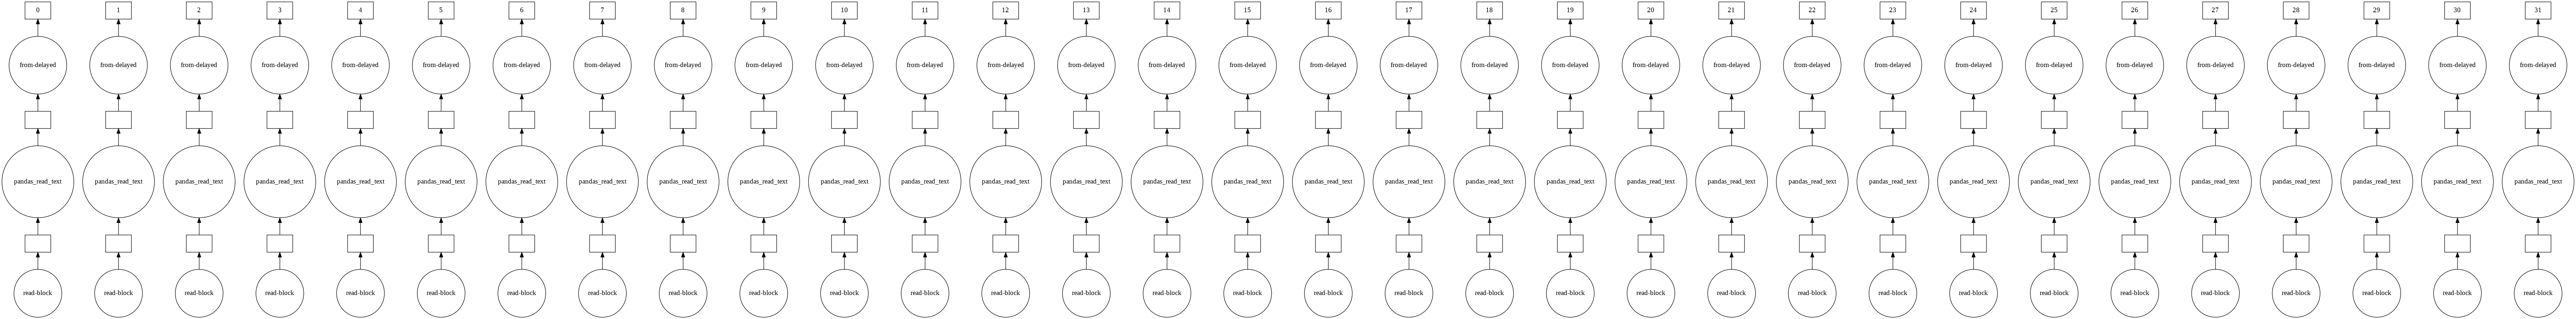

In [0]:
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
month.visualize()

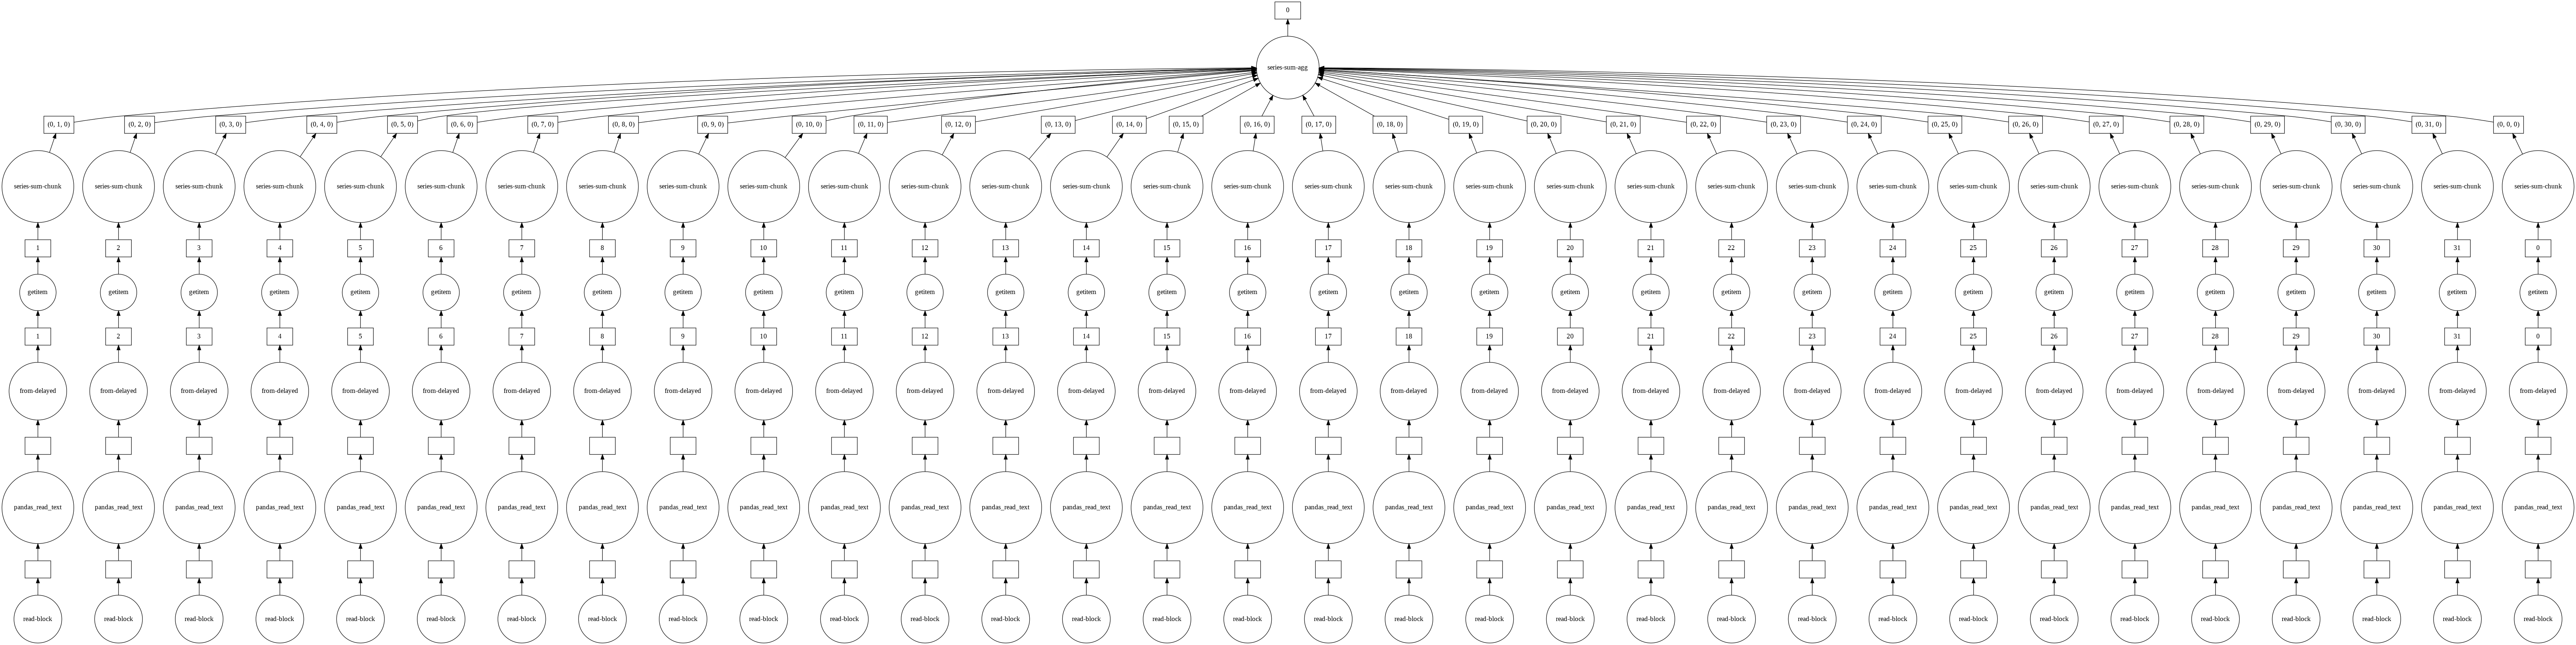

In [0]:
month.fare_amount.sum().visualize()

In [0]:
#table below shows few datapoints along with all our features
month.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [0]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

### 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [0]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())



# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

In [0]:
frame_with_durations.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


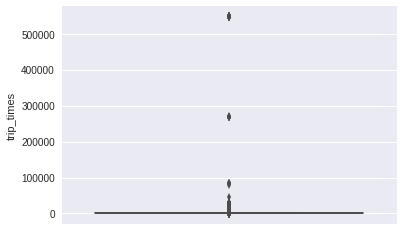

In [0]:
%matplotlib inline
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [0]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -1211.0166666666667
10 percentile value is 3.8333333333333335
20 percentile value is 5.383333333333334
30 percentile value is 6.816666666666666
40 percentile value is 8.3
50 percentile value is 9.95
60 percentile value is 11.866666666666667
70 percentile value is 14.283333333333333
80 percentile value is 17.633333333333333
90 percentile value is 23.45
100 percentile value is  548555.6333333333


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.45
91 percentile value is 24.35
92 percentile value is 25.383333333333333
93 percentile value is 26.55
94 percentile value is 27.933333333333334
95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.46666666666667
98 percentile value is 38.71666666666667
99 percentile value is 46.75
100 percentile value is  548555.6333333333


In [0]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

# after removing the outliers of trip times we got the dataframe frame_with_durations_modified

In [0]:
frame_with_durations_modified.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


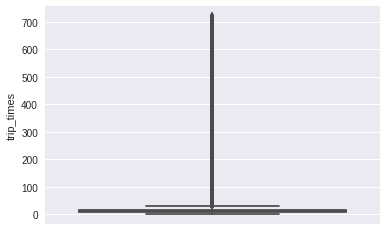

In [0]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

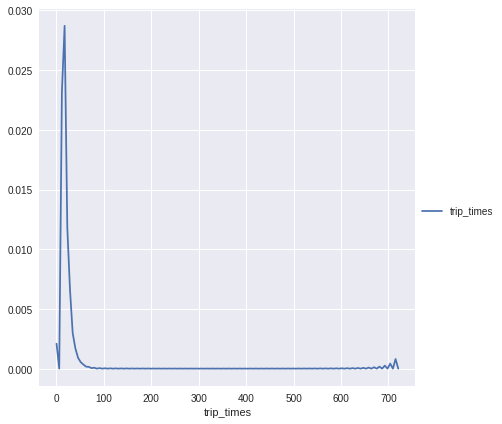

In [0]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [0]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

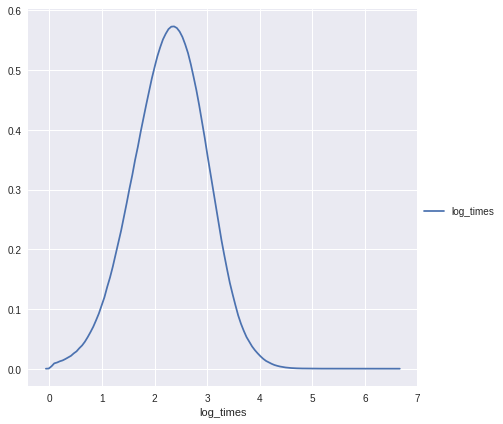

In [0]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

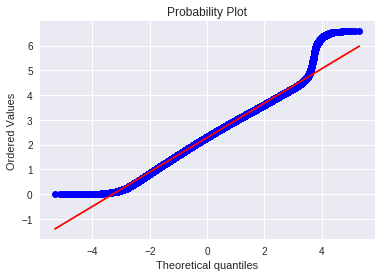

In [0]:
import scipy
#Q-Q plot for checking if trip-times is log-normal
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### 4. Speed

In [0]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

<IPython.core.display.Javascript object>

In [0]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is  192857142.85714284


In [0]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is  192857142.85714284


In [0]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is  192857142.85714284


In [0]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<45.31)]

In [0]:
#avg.speed of cabs in New-York
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

12.450173996027528

<b style='font-size:16px'>The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### 4. Trip Distance

In [0]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [0]:

#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.97
100 percentile value is  258.9


In [0]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5.97
91 percentile value is 6.45
92 percentile value is 7.07
93 percentile value is 7.85
94 percentile value is 8.72
95 percentile value is 9.6
96 percentile value is 10.6
97 percentile value is 12.1
98 percentile value is 16.03
99 percentile value is 18.17
100 percentile value is  258.9


In [0]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.96
99.7 percentile value is 20.5
99.8 percentile value is 21.22
99.9 percentile value is 22.57
100 percentile value is  258.9


In [0]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<23)]

In [0]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

### 5. Total Fare

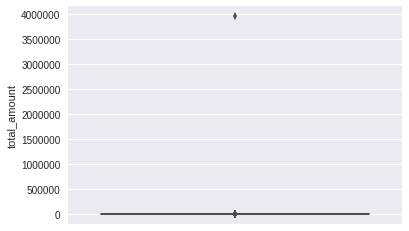

In [0]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [0]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is  3950611.6


In [0]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.3
93 percentile value is 31.8
94 percentile value is 34.8
95 percentile value is 38.53
96 percentile value is 42.6
97 percentile value is 48.13
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is  3950611.6


In [0]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.58
99.8 percentile value is 75.35
99.9 percentile value is 88.28
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

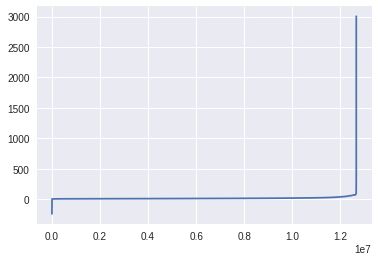

In [0]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

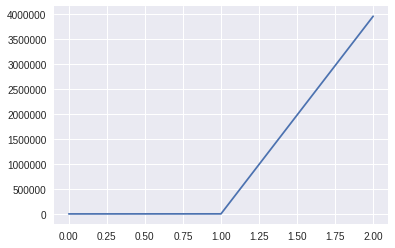

In [0]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

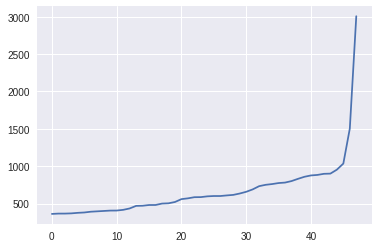

In [0]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

## Remove all outliers/erronous points.

In [0]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):

    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [0]:
print ("Removing outliers in the month of Jan-2015")
print ("----")
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
print("fraction of data points that remain after removing outliers", float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


# finally we have extractes the features after removing the outliers of jan 2015 dataframe

*  now we assign cluster for each data point based on its location of latitude and longtitude
* we add pickup bin to the each data point based on the pickup time of that particular point claibrated to 10 min time interval
* we will consider 2 mile for making the clusters
* we will consider 10 min interval for bin
* using all these features we our class label gonna be the number of pickups 

# Data-preperation
## Clustering/Segmentation

In [0]:
#trying different cluster sizes to choose the right K in K-means
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)            

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0945442325142543 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.7131298007387813 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.5185088176172206 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 32.0 
Min inter-cluster distance 

In [0]:
# if check for the 50 clusters you can observe that there are two clusters with only 0.3 miles apart from each other
# so we choose 40 clusters for solve the further problem

# Getting 40 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

### Plotting the cluster centers:

In [0]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### Plotting the clusters:

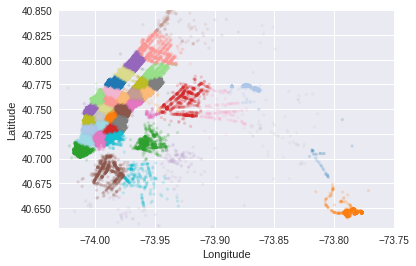

In [0]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.pickup_longitude.values[:100000], frame.pickup_latitude.values[:100000], s=10, lw=0,
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(frame_with_durations_outliers_removed)

## Time-binning

In [0]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [0]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

* finally we draw the various features from the 2015 year january datframe

In [0]:
# we add two more columns 'pickup_cluster'(to which cluster it belogns to) 
# and 'pickup_bins' (to which 10min intravel the trip belongs to)
jan_2015_frame.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,34,2163
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,2,1452
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,16,1452
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,38,1452
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,22,1452


In [0]:
jan_2015_groupby

trip_distance
pickup_cluster pickup_bins               
0              33                     104
               34                     200
               35                     208
               36                     141
               37                     155
               38                     139
               39                     181
               40                     166
               41                     167
               42                     160
               43                     154
               44                     167
               45                     118
               46                     137
               47                     134
               48                     145
               49                     150
               50                     136
               51                      94
               52                     108
               53                      89
               54                      78
               55                      73
               56                      54
               57                      54
               58                      47
               59                      35
               60                      27
               61                      32
               62                      25
...                                   ...
39             4467                   191
               4468                   189
               4469                   193
               4470                   184
               4471                   201
               4472                   217
               4473                   182
               4474                   200
               4475                   195
               4476                   178
               4477                   192
               4478                   176
               4479                   174
               4480                   178
               4481                   179
               4482                   178
               4483                   177
               4484                   169
               4485                   185
               4486                   202
               4487                   182
               4488                   171
               4489                   185
               4490                   186
               4491                   145
               4492                   154
               4493                   178
               4494                   154
               4495                   157
               4496                   156

[170398 rows x 1 columns]

In [0]:
#number of features that we contrain in the january 2015 dataframe
jan_2015_frame.columns

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'total_amount', 'trip_times', 'pickup_times', 'Speed', 'pickup_cluster',
       'pickup_bins'],
      dtype='object')

* now we take the data from the 2016 year january february and march data frames 
* using the 2016 datas we extract he features after performing the methods of feature extraction 
* which involvec the removal of outliers
* we also perform the feature engineering methods to get the features like pickup cluster and pickup bins

In [0]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              33                     104
               34                     200
               35                     208
               36                     141
               37                     155

# we perform smoothing only on 2015 not on jan,feb,march of 2016 data which are out train and test data

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1zfDwQmNyZUzkVhRys5j09uVk9Fwyv3if' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1zfDwQmNyZUzkVhRys5j09uVk9Fwyv3if


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yellow_tripdata_2016-01.csv')  
month_jan_2016 = dd.read_csv('yellow_tripdata_2016-01.csv')

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1bWdNt9F3ZakZ1-ZPzGUA7QCGzBS49yBL' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1bWdNt9F3ZakZ1-ZPzGUA7QCGzBS49yBL


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yellow_tripdata_2016-02.csv')  
month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=12hFPRHhGAFZk8eF-WssicyX6OPUriSYR' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

12hFPRHhGAFZk8eF-WssicyX6OPUriSYR


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('yellow_tripdata_2016-03.csv')  
month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')


* for 2016 data we add the features and preprocess the few features
* we add pickup cluster and pickup bin 
* what is the difference between pickup cluster and pickup bin
* picup cluster is the cluster from the which the pickup point is there after getting the cluster to each point based on the latitude and longtitude
* pickup bin is the time when the pickup is happening.


In [0]:
# upto now we cleaned data and prepared data for the month 2015,
from sklearn.cluster import KMeans
# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickuo_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
    







In [0]:
jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)

In [0]:
feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  11382049
Number of outlier coordinates lying outside NY boundaries: 223161
Number of outliers from trip times analysis: 27670
Number of outliers from trip distance analysis: 81902
Number of outliers from speed analysis: 22437
Number of outliers from fare analysis: 5476
Total outliers removed 308177
---
Estimating clusters..
Final groupbying..


In [0]:
mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  12210952
Number of outlier coordinates lying outside NY boundaries: 232444
Number of outliers from trip times analysis: 30868
Number of outliers from trip distance analysis: 87318
Number of outliers from speed analysis: 23889
Number of outliers from fare analysis: 5859
Total outliers removed 324635
---
Estimating clusters..
Final groupbying..


## Smoothing

# actually for the january month of 2015, 4464 number of unique pickups should present but we are not having in each cluster  
# similarly in other clusters due to reason of all bins not presenting we will use the process of smoothing so that all the bins are present with average value
* so what we do is  we take the cluster and find the number of missing pickup bins.
* we will fill the values with zeros.
* similarly we do this to  january,febrauary and march dataframes of 2016 also.

* for the models the output class labels are the number of pickups
* we should calculate the number of pickups and set it as a class label for the data point

In [0]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        
        values.append(list_unq)
    return values

# the above output clearly states that bins are missing so we compensate all the bins with the values.

In [0]:
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)


In [0]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

#jan
#jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)


#march
#since we are not taking march data due to computation limits
#mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [0]:
#feb
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)


In [0]:
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [0]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(40):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

# we are doing two things 
* fill missing with zero
* perform smoothing
* but what we are filling?
* number of pickups.
* we have number of pickups in trip_distance column after performing the groupby and count.
* we put all the 4464 bins (or else what ever the maximum number of bins in that particular month(4176 in case of february) ) and the number of pickups in each bin.
* since each cluster doesnot have all the bins, if particular bin is present in the cluster put the value of number of pickups
* if the particular bin is not present in the cluster then number of pickups also not present so fill it with zero in case of 2015
* fill that based on the avewrage of previous values in case of 2016 data which i s called smoothing.
 **we will finally have cluster and every time bin in that particular cluster and pickup value of time bin of that particular cluster**

In [0]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [0]:
def fill_missing1(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4176):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [0]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [0]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [0]:

jan_2016_smooth=fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)




In [0]:
feb_2016_smooth=fill_missing1(feb_2016_groupby['trip_distance'].values,feb_2016_unique)

In [0]:
mar_2016_smooth=fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

In [0]:
print(len(mar_2016_smooth))
print(len(feb_2016_smooth))

178560
167040


In [0]:
print(np.array(jan_2016_smooth).shape)
print(np.array(feb_2016_smooth).shape)

(178560,)
(178560,)


# below cloumn shows the entire crux of story
* we 4464 ten minute time bins in each cluster (4176 in case of febraury)
* 4464 pickup values should present in each cluster.
* there are 40 clusters 
* for every bin each cluster we calculated thh number of pickups which can be average value or zero or actual value 

In [0]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 40*4464 = 178560 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  178560


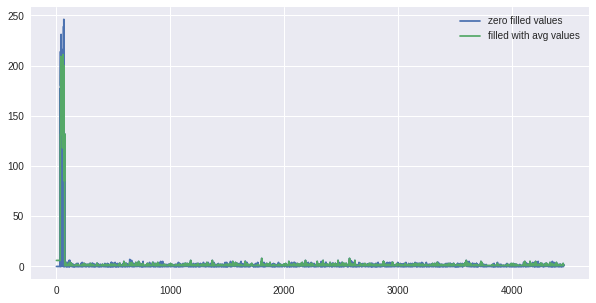

In [0]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8920], label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

In [0]:
# why we choose, these methods and which method is used for which data?

# Ans: consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 
# 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel 
# and 20 pickups happened in 4th 10min intravel.
# in fill_missing method we replace these values like 10, 0, 0, 20
# where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups 
# that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 
# wheen you are using smoothing we are looking at the future number of pickups which might cause a data leakage.

# so we use smoothing for jan 2015th data since it acts as our training data
# and we use simple fill_misssing method for 2016th data.

In [0]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)

print(len(jan_2015_smooth))
print(len(jan_2016_smooth))
print(len(feb_2016_smooth))

178560
178560
178560


In [0]:
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

In [0]:
print(february_2016_smooth)

In [0]:
print(march_2016_smooth)

In [0]:
jan2015smoothingdata=pd.DataFrame(jan_2015_smooth)
jan2015smoothingdata.to_csv('jan2015smoothingdata.csv')
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'jan2015smoothingdata.csv'})
uploaded.SetContentFile('jan2015smoothingdata.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
jan2015smoothingdata=pd.DataFrame(feb_2016_smooth)
jan2015smoothingdata.to_csv('feb2016smoothingdataactual.csv')
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'feb2016smoothingdataactual.csv'})
uploaded.SetContentFile('feb2016smoothingdataactual.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
jan2015smoothingdata=pd.DataFrame(jan_2016_smooth)
jan2015smoothingdata.to_csv('jan2016smoothingdata.csv')
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'jan2016smoothingdata.csv'})
uploaded.SetContentFile('jan2016smoothingdata.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
mar2016smoothingdata=pd.DataFrame(mar_2016_smooth)
mar2016smoothingdata.to_csv('mar2016smoothingdata.csv')
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'mar2016smoothingdata.csv'})
uploaded.SetContentFile('mar2016smoothingdata.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

due to limited computational power  we ahve converted the data into csv file we can use these files to generate the train and test data
january smoothing  data sharable link 
https://drive.google.com/open?id=1L9gyWu4ppFSOnjdHOdiaUJzsW9KTMeIj
february smoothing data sharable link
https://drive.google.com/open?id=1IIxSzvekOzyWjpa7x8YbdkSTOlpHi2BA
for march
https://drive.google.com/open?id=1UudETdZQbfV5voowjk_28lY8Op4k6SFa
we take the list of the datas 

# to overcome memory error these lists are stored in the form of csv files 
* we can retrieve them back and perform feature engineering and modelise them.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1L9gyWu4ppFSOnjdHOdiaUJzsW9KTMeIj' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1L9gyWu4ppFSOnjdHOdiaUJzsW9KTMeIj


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('jan2016smoothingdata.csv')  

In [0]:
jan2016smooth=pd.read_csv('jan2016smoothingdata.csv',names=['a'])

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1IIxSzvekOzyWjpa7x8YbdkSTOlpHi2BA' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1IIxSzvekOzyWjpa7x8YbdkSTOlpHi2BA


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('feb2016smoothingdataactual.csv')  

In [0]:
feb2016smooth=pd.read_csv('feb2016smoothingdataactual.csv',names=['a'])

In [0]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1UudETdZQbfV5voowjk_28lY8Op4k6SFa' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1UudETdZQbfV5voowjk_28lY8Op4k6SFa


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mar2016smoothingdata.csv')  

In [0]:
march2016smooth=pd.read_csv('mar2016smoothingdata.csv',names=['a'])

In [0]:
mar_2016_smooth=list(march2016smooth['a'])
feb_2016_smooth=list(feb2016smooth['a'])
jan_2016_smooth=list(jan2016smooth['a'])


# we are appending 2016 january and february data into list of regions_cum serirs of bins forming 4464+4176+4464=13104
# this means each regions_cum will contain each cluster with 13099 pickup values.
# then for each cluster we divide the data into train and test data.and each cluster.

In [0]:
print(jan_2016_smooth)
print(feb_2016_smooth)
print(mar_2016_smooth)

Output hidden; open in https://colab.research.google.com to view.

* these are the values of the total bins of total cluster.
* january  and march consisting of data of (40*4464)
*  february consisting of the data of  40*4176
* each cluster will consist of 4464 from the january data ,4464 from the march data and 4176 from the february data as pickupvalues in that particular bins.

In [0]:
regionscumulative=[]
for i in range(0,40):
  regionscumulative.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])
print(len(regionscumulative))
print(len(regionscumulative[0]))
print(4464+4176+4464)

40
13104
13104


# As per the tasks of assignment 
### 1. include frequency and amplitude features 
### 2.perform the different hyperparameter tunuing for the different models.
### 3.perform with more time features .

In [0]:
%matplotlib inline
def uniqueish_color():
  return plt.cm.gist_ncar(np.random.random())
first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))
for i in range(40):
    print('for the cluster ',i)
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regionscumulative[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regionscumulative[i][4464:8640], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regionscumulative[i][8640:13104], color=uniqueish_color(), label='2016 march month data')
    plt.legend()
    plt.show()
   

Output hidden; open in https://colab.research.google.com to view.

##### we have seen the graph of the time bins vs the number of pickup values these timebin values will vary over 3 months.
#### This is a time series data in which we can see the sinusoidal behavior in the waves.
#### we gonna featurise this data by considering the previos pickup values.


#### if we see the frequency behavior of the pickup vlaues of cluster

#### In using frequencies as the features we plot the frequencies vs the amplitudes where we plot the frequencies on x axis and amplitudes on y axis. where we take the time samples and convert them into frequencies.in ur case time samples are bins and the amplitudes are values present in the bins.
* we take the maximum frequencies and maximum samples form each cluster and apped as the features for that particualr cluster.
* to get the amplitudes amplitudes=numpy.fft.fft(binvalues)
* frequencies =numpy.fftfreq(number_of_bins,timeperiod)
* timeperiod is one in our case in which the differnce between two bins
#### plotting the fft plot of every cluster

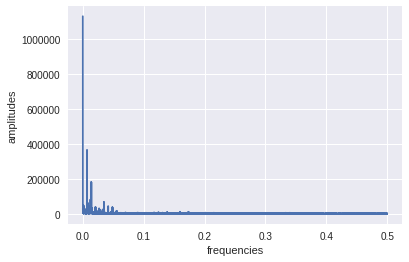

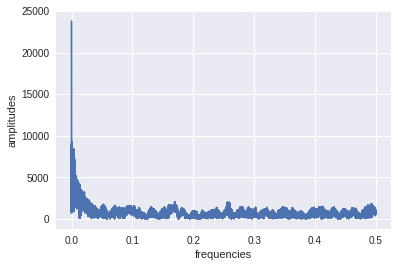

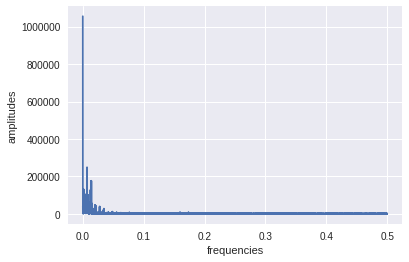

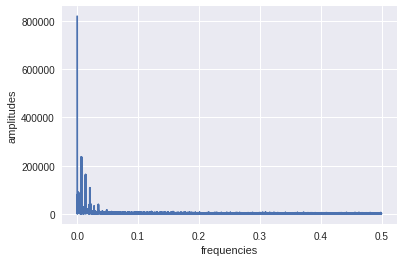

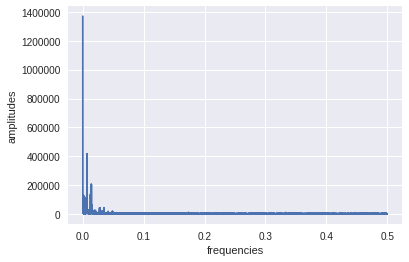

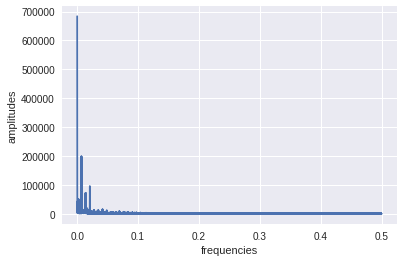

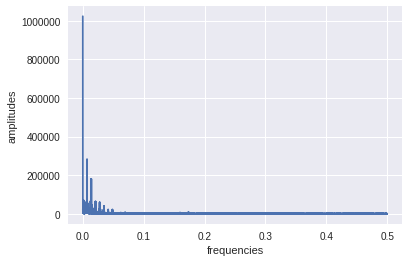

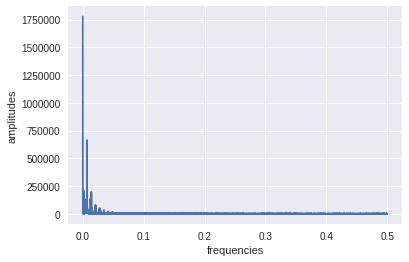

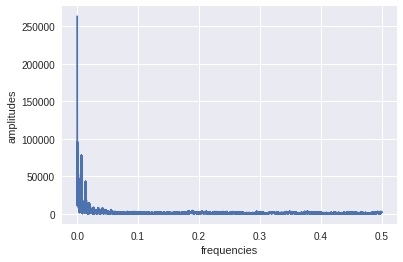

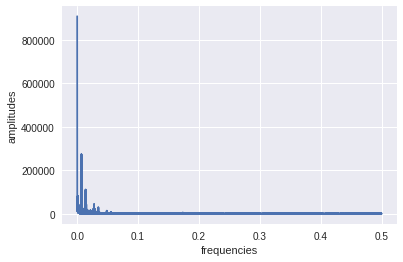

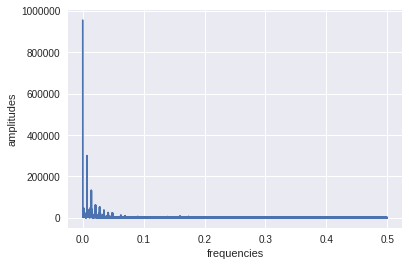

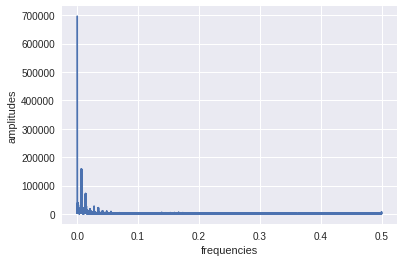

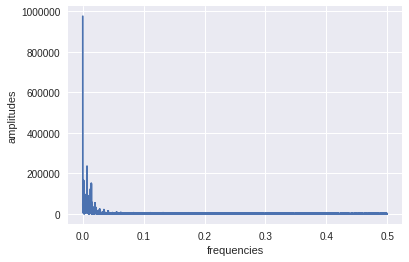

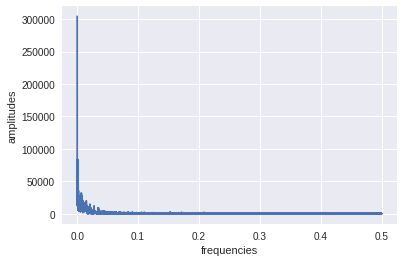

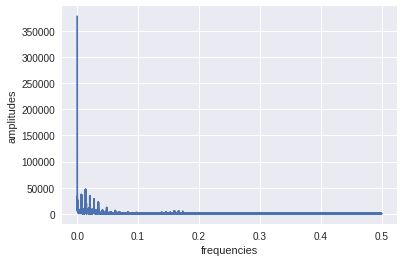

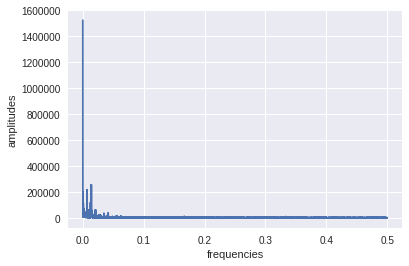

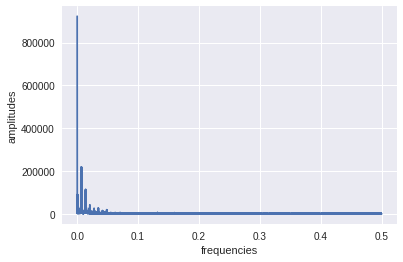

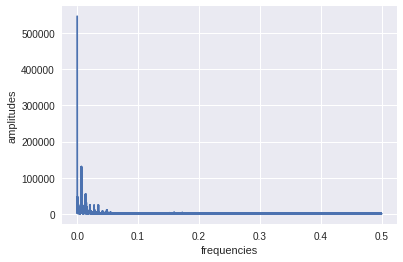

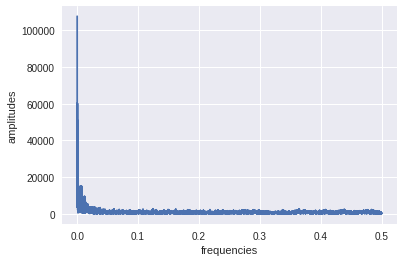

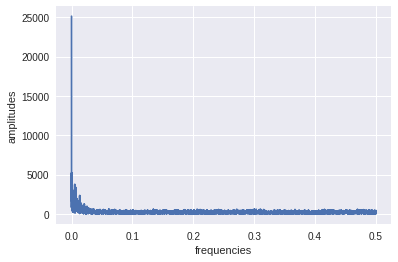

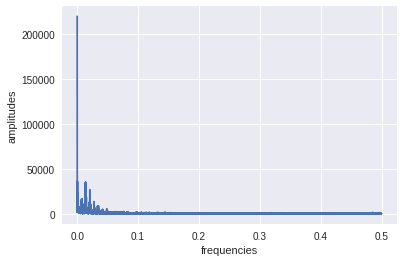

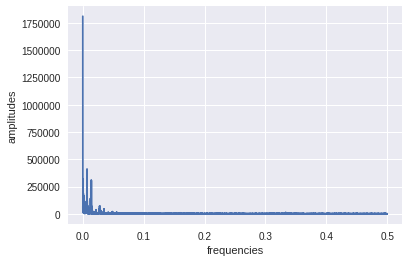

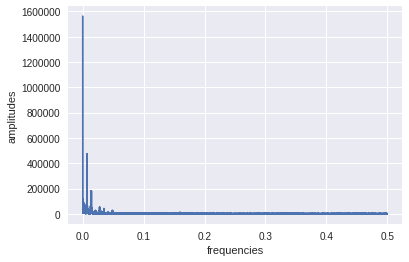

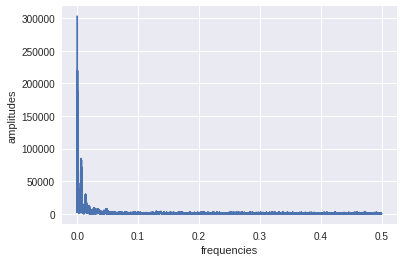

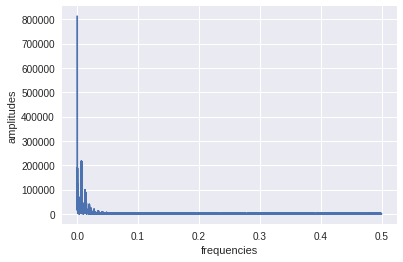

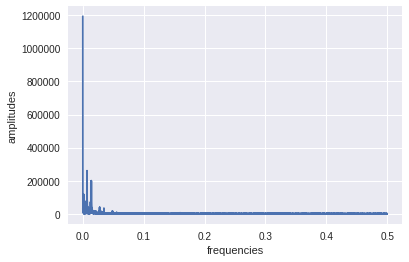

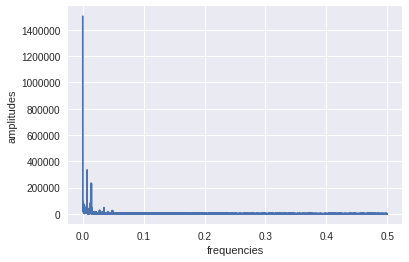

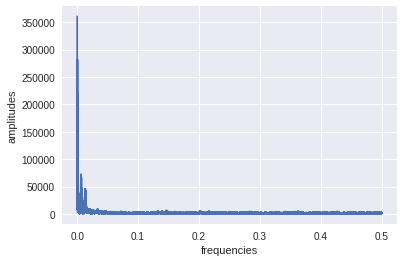

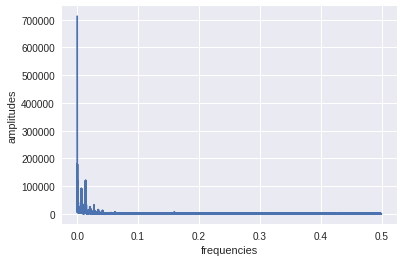

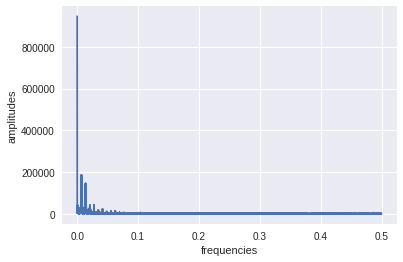

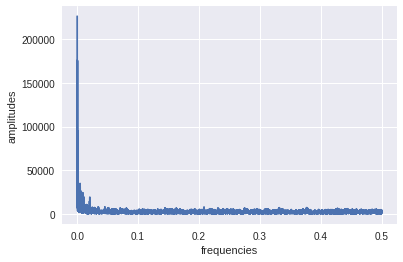

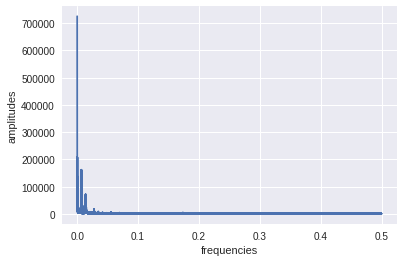

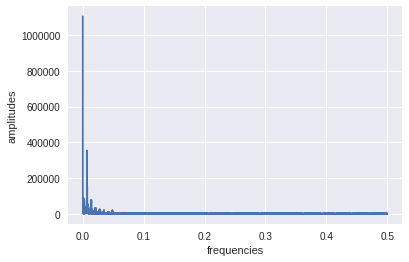

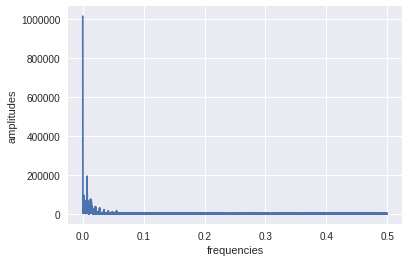

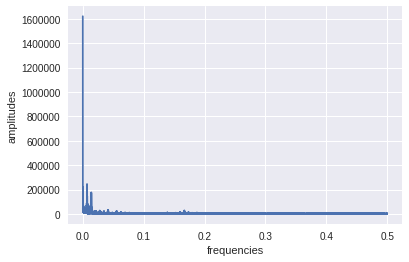

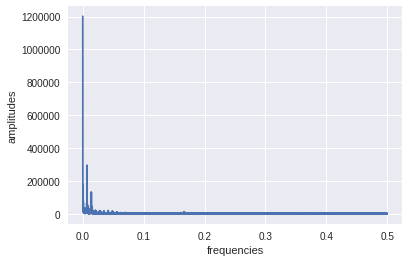

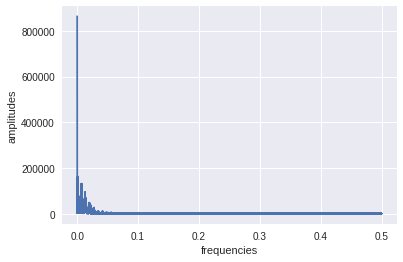

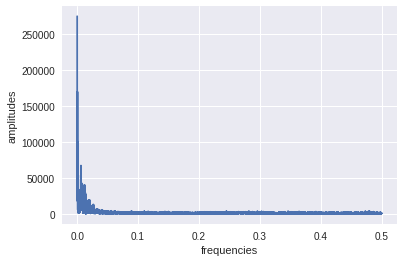

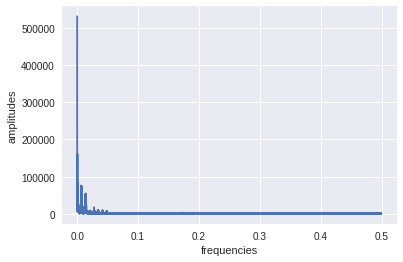

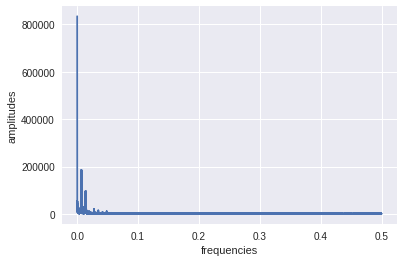

In [0]:
maximumamplitudes=[]
for i in range(0,40):
  amplitudes=np.abs(np.fft.fft(regionscumulative[i][0:13104]))
  frequencies=np.abs(np.fft.fftfreq(13104,1))
  plt.plot(frequencies,amplitudes)
  plt.xlabel('frequencies')
  plt.ylabel('amplitudes')
  plt.show()

In [0]:
print(len(amplitudes))
print(len(frequencies))

13104
13104


##### now we have to find the top 3 amplitudes of each cluster and the frequencies of that particular amplitudes and add them as the features to that particualr cluster.

In [0]:
featureamplitudes=[]
featurefrequencies=[]
feature_amplitude_frequencies=[]
for i in range(0,40):
  amplitudes=np.abs(np.fft.fft(regionscumulative[i][0:13104]))
  amplitudes=amplitudes.astype(int)
  maximumamplitudesindices=np.argsort(amplitudes)[::-1][:5]
  amplitude_as_features=list(amplitudes[maximumamplitudesindices])
  frequencies=np.abs(np.fft.fftfreq(13104,1))
  frequencies_as_features=list(frequencies[maximumamplitudesindices])
  for j in range(13099):
    feature_amplitude_frequencies.append(amplitude_as_features+frequencies_as_features)
   
  

In [0]:
print(len(feature_amplitude_frequencies))
print(13099*40)

523960
523960


## Regression Models

####  we are having the total bins of 4464+4176+4464=13104 bins . wea re taking the last 5 pickup points as features . hence we will be having the 13104-5=12099 bins.now our training data is latitude and longtitude of each bin,pickups in the last 5 bins. weekday and exponential average of that particular bin.number of pickups on the present bin.

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [0]:
#brilliant code
number_of_time_stamps = 5
outputpickupvalue= []
latitudeinfo = []
longtitudeinfo= []
weekdayinfo = []
lastpickupfeature = []
lastpickupfeature= [0]*number_of_time_stamps
for i in range(0,40):
    latitudeinfo.append([kmeans.cluster_centers_[i][0]]*13099)
    longtitudeinfo.append([kmeans.cluster_centers_[i][1]]*13099)
    weekdayinfo.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    lastpickupfeature = np.vstack((lastpickupfeature,[regionscumulative[i][r:r+number_of_time_stamps] for r in range(0,len(regionscumulative[i])-number_of_time_stamps)]))
    outputpickupvalue.append(regionscumulative[i][5:])
    #print(outputpickupvalue)
    #print(len(outputpickupvalue[0]))
    #13099



In [0]:

alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regionscumulative[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regionscumulative[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [0]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [0]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [lastpickupfeature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)

test_features = [lastpickupfeature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [0]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features1 =  [feature_amplitude_frequencies[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features1 = [feature_amplitude_frequencies[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [0]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [0]:
print("Number of data clusters",len(train_features1), "Number of data points in trian data", len(train_features1[0]), "Each data point contains", len(train_features1[0][0]),"features")
print("Number of data clusters",len(train_features1), "Number of data points in test data", len(test_features1[0]), "Each data point contains", len(test_features1[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 10 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 10 features


In [0]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in latitudeinfo]
tsne_train_flat_lon = [i[:9169] for i in longtitudeinfo]
tsne_train_flat_weekday = [i[:9169] for i in weekdayinfo]
tsne_train_flat_output = [i[:9169] for i in outputpickupvalue]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]


In [0]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in latitudeinfo]
tsne_test_flat_lon = [i[9169:] for i in longtitudeinfo]
tsne_test_flat_weekday = [i[9169:] for i in weekdayinfo]
tsne_test_flat_output = [i[9169:] for i in outputpickupvalue]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [0]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(np.hstack((train_features[i],train_features1[i])))
test_new_features = []
for i in range(0,40):
   test_new_features.extend(np.hstack((test_features[i],test_features1[i])))

In [0]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [0]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [0]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1','amplitude1','amplitude2','amplitude3','amplitude4','amplitude5','freq.amplitude1','freq.amplitude2','freq.amplitude3','freq.amplitude4','freq.amplitude5']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg

print(df_train.shape)

(366760, 19)


In [0]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(157200, 19)


In [0]:
df_test.head(5)

,ft_5,ft_4,ft_3,ft_2,ft_1,amplitude1,amplitude2,amplitude3,amplitude4,amplitude5,freq.amplitude1,freq.amplitude2,freq.amplitude3,freq.amplitude4,freq.amplitude5,lat,lon,weekday,exp_avg
0,121.0,105.0,143.0,145.0,119.0,1128411.0,363730.0,363730.0,181588.0,181588.0,0.0,0.006944,0.006944,0.013889,0.013889,40.776228,-73.982119,4,116
1,105.0,143.0,145.0,119.0,113.0,1128411.0,363730.0,363730.0,181588.0,181588.0,0.0,0.006944,0.006944,0.013889,0.013889,40.776228,-73.982119,4,121
2,143.0,145.0,119.0,113.0,124.0,1128411.0,363730.0,363730.0,181588.0,181588.0,0.0,0.006944,0.006944,0.013889,0.013889,40.776228,-73.982119,4,120
3,145.0,119.0,113.0,124.0,121.0,1128411.0,363730.0,363730.0,181588.0,181588.0,0.0,0.006944,0.006944,0.013889,0.013889,40.776228,-73.982119,4,127
4,119.0,113.0,124.0,121.0,131.0,1128411.0,363730.0,363730.0,181588.0,181588.0,0.0,0.006944,0.006944,0.013889,0.013889,40.776228,-73.982119,4,115


In [0]:
print(df_train.shape)

(366760, 19)


### standardising the data is very important it reduced my mape from 22 to 9.  i got 22 without standardising

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_train=scale.fit_transform(df_train)
scale1=StandardScaler()
df_test=scale1.fit_transform(df_test)

### Using Linear Regression

In [0]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
params={
    'alpha':[10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4]
    }
model=SGDRegressor(loss='squared_loss',penalty='l2')
#model=LinearRegression()

sigmamodel=GridSearchCV(model,param_grid=params,scoring='neg_mean_absolute_error',cv=4)
sigmamodel.fit(df_train,tsne_train_output)
print(sigmamodel.best_params_)
print(sigmamodel.cv_results_)

{'alpha': 0.0001}
{'mean_fit_time': array([0.54988891, 0.58651382, 0.57441312, 0.58622676, 0.58235532,
       0.59289598, 0.5798614 , 0.59354156, 0.60202742]), 'std_fit_time': array([0.00318173, 0.01143882, 0.00925496, 0.0079241 , 0.01710638,
       0.00836906, 0.00300694, 0.01269465, 0.00497848]), 'mean_score_time': array([0.01092231, 0.01302916, 0.01361936, 0.01334625, 0.01336169,
       0.01332724, 0.01328737, 0.01332784, 0.01330686]), 'std_score_time': array([1.39655921e-03, 2.92455807e-04, 6.99078003e-04, 1.99965215e-04,
       2.16825608e-04, 1.09776481e-04, 2.32155577e-04, 6.84080615e-05,
       1.67734545e-04]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 100}, {'alpha'

In [0]:
mod=SGDRegressor(loss='squared_loss',alpha=0.0001)
mod.fit(df_train,tsne_train_output)
y_pred = mod.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_test_output,lr_test_predictions))
y_pred =mod.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_train_output,lr_train_predictions))

9.719968193384224
9.211304395244847


### Using Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
params={'bootstrap': [True, False],
 'max_depth': [10, 30, 50,75 ],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 300, 500, 1000]}
regr1 = RandomForestRegressor()
sigmamodel=RandomizedSearchCV(regr1,param_distributions=params,scoring='neg_mean_absolute_error',cv=4)
sigmamodel.fit(df_train,tsne_train_output)
print(sigmamodel.best_params_)
print(sigmamodel.cv_results_)

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
{'mean_fit_time': array([  77.40287334,  313.62021458,   49.16944385,  169.10775602,
        742.06496155,  103.58275604,  111.60486788, 1010.09953618,
        616.10138834, 1655.69479495]), 'std_fit_time': array([ 1.23023355,  6.73882852,  0.50891022,  3.8766938 ,  9.33417954,
        1.91329749,  2.08840495, 15.33481577,  9.22982887, 28.26123332]), 'mean_score_time': array([ 0.32927555,  2.8932234 ,  0.31515568,  1.58922315,  3.17848796,
        1.32920706,  1.44931376,  9.67181599,  7.1847617 , 15.52460432]), 'std_score_time': array([0.01060974, 0.07188122, 0.00901847, 0.02303501, 0.13734931,
       0.03379656, 0.05636963, 0.48416826, 0.16954761, 0.78378478]), 'param_n_estimators': masked_array(data=[50, 100, 50, 50, 500, 50, 50, 300, 300, 500],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
     

In [0]:
mod= RandomForestRegressor(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 2, max_depth= 10, bootstrap= True)
mod.fit(df_train,tsne_train_output)
y_pred = mod.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_test_output,lr_test_predictions))
y_pred =mod.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_train_output,lr_train_predictions))

9.583784987277353
8.759722979605192


In [0]:
#feature importances based on analysis using random forest
print (mod.feature_importances_)


[1.43865373e-03 1.51737866e-03 1.27874108e-03 1.62610365e-03
 2.97272632e-03 9.56057453e-04 1.41923338e-04 1.39090571e-04
 1.14054314e-04 1.07526275e-04 0.00000000e+00 4.47368538e-05
 5.30442470e-05 4.14955947e-05 4.47575991e-05 2.19156521e-04
 5.50598188e-04 3.36503978e-04 9.88417452e-01]


### Using XgBoost Regressor

In [0]:
hyper_parameter = {"max_depth":[1,5,10,20], "n_estimators":[40, 80, 150, 600]}
clf = xgb.XGBRegressor()
best_parameter = RandomizedSearchCV(clf, hyper_parameter, scoring = "neg_mean_absolute_error", cv = 3)
best_parameter.fit(df_train, tsne_train_output)
estimators = best_parameter.best_params_["n_estimators"]
depth = best_parameter.best_params_["max_depth"]

In [0]:
print(best_parameter.best_params_)

{'n_estimators': 80, 'max_depth': 10}


In [0]:
mod= xgb.XGBRegressor(n_estimators=80,max_depth=10)
mod.fit(df_train,tsne_train_output)
y_pred = mod.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_test_output,lr_test_predictions))
y_pred =mod.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]
print(mean_absolute_error(tsne_train_output,lr_train_predictions))


9.386393129770992
7.939246373650343


### Calculating the error metric values for various models

##  ERROR METRIC VALUES BEFORE USING THE FREQUNCIES AS FEATURES

In [0]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))

test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [0]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.140052758787       Test:  0.136531257048
Exponential Averages Forecasting -           Train:  0.13289968436       Test:  0.129361804204
Linear Regression -                         Train:  0.13331572016       Test:  0.129120299401
Random Forest Regression -                   Train:  0.0918514693197      Test:  0.127141622928


##USING THE FREQUENCIES AS FEATURES THE ERROR METRICS IN MAPE IS 

In [2]:
import pandas as pd
dta = [['LINEAR REGRESSION',9.2,9.7],['RANDOM FOREST REGRESSOR',8.75,9.58],['xgb REGRESSOR WITH RANDOM SEARCH CV',7.93,9.38]]
aa=pd.DataFrame(dta, columns=['model',"MAPE_FOR TRAIN DATA",'MAPE FOR TEST DATA'])
aa

,model,MAPE_FOR TRAIN DATA,MAPE FOR TEST DATA
0,LINEAR REGRESSION,9.20,9.70
1,RANDOM FOREST REGRESSOR,8.75,9.58
2,xgb REGRESSOR WITH RANDOM SEARCH CV,7.93,9.38


### DOCUMENTATION CONCLUSION AND KEYTAKEAWAYS OF TAXI DEMAND PREDICTION

##### * IN TAXI DEMAND PREDICTION ASSIGNMENT WE TAKEN THE DATA OUR PEOBLEM STATEMENT IS WE HAVE TO PREDICT THE NUMBER OF PICKUPS IN THE PARTICULAR CLUSTER IN ANOTHER  MINUTES.
##### * WE HAVE THE DATA OF FOUR MONTHS WITH VARIOUS FEATURES SUCH AS PICKUP LATITUDE,LONGTITUDE,SPED,FARE.
##### * IT IS US TO PERFORM THE FEATURE ENGINEERING AND 0OBTAIN THE RIGT FEATURE AND PREDICT THE REQUIREMENT FROM THE DATA WE HAVE.
AS A PART OF DATA PREPROCESSING WE SELECTES THE COLUMNS THAT ARE MORE IMPORTANT THAT CAN BE USED FOR PREDICTION OF FUTURE PICKUPS.
* WE HAVE PERFORMED EXPLORATORY DATA ANALYSIS AND VISUALISED THE FEATURES HOW THEY ARE PERFORMING.
* we have used box plots and violin plots to find the outliers presence and used the percentilevalues to detect hte thresholds
* we removed the outliers form the data based on the outliers detected.
* as a part of feature engineering we ahve extracted the features like trip times from the already existing features.
* then we applied strategy of feature engineering technique we divided the area into variou clusters based on the longitudes and latitudes.
* uisng the kmeans clustering divided the area into various clusters uniformly based on the number of pickups.
* we found the optimal number o9f clusters by condition of  10 minute time bins we founfd te optimal number of clusters uising the threshold as 2 miles.
* we assumed that it takes 10 minutes for a cab driver to travel 2 miles.
* using the unix time we have divided the january,feb,march data into tome bins which are discrete varying y 10 minutes which is 600 seconds.
* we have to predict the number of pickups based on the number of trip times we have taken the number of pickups in particular cluster.
* we have added pickup bins in each cluster but the every cluster is not having the all pickupbins hence we have done the preocess of smoothing with average vallues or fill the missing bins with null values.
* in january 2016 we have 4464 bins feb 2016 we ave 4176 bins mar 2016 we have 4464 bins are present.
* totally we have 13104 bins present by the way we have 13104 bins in each cluster and we have the 40 clusters present .
* so totally we have the 524160 bins present which is (13104*40)
* for featurisation we have considerd the previous 5 time bin values as features so we are left with 13099 bins.
* observing the amplitudes of the time bis of each cluster it follows a sinusoidal path.
* this is a key take away from the analysis the reason consider the previous pickup values as the features.
* we have also considerd the top frequencies and top ampltudes of the frequencies as the features for each cluster.
* we have taken the top 3 frequencies and top 3 amplitudes of that frequencies for each cluster.
* we have taken centroid which is the cluster center instead of taking the pickup point coordinates.
* now we have 13099 bins.we have divided the train data and test data.
* traindata consists of 9169 points as train data for each cluster.
* we have 9169*40 points as train points=366760
* we have 3929 points as test data points in each cluster
* we have 3929*40 points as the test data points.
* extreemly important thing before applying the model is data standardisation (it reduces my mape from 22 to 9)
#### we applied our machine learning models like
* linear regression with grid search cv.
* random forest regressor random searchcv.
* xgb regressor with random search cv
* conclusion are displayed above.